# STUDENT NAME, STUDENT NUMBER (TO BE FILLED BY THE STUDENT)

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 12-October-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join("assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children? (complement visualization with a statistic information). In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


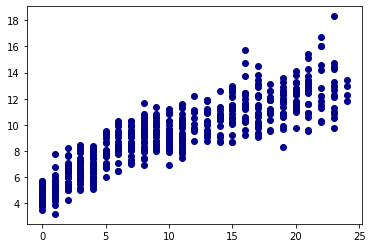

Correlation coefficient = 0.8796145418327413


In [2]:
import matplotlib.pyplot as plt

# assign age and weight values to variables x and y
x = dataDF[['age']].values
y = dataDF[['weight']]

# plot x and y in a scatter plot
plt.scatter(x, y, c = "darkblue")
plt.show()

# calculate and print the correlation between weight and age
corr = dataDF[["age", "weight"]].corr()
print("Correlation coefficient = {0}".format(corr.iloc[0,1]))

**Answer:** In my opinion it is reasonable to create a linear regression model to predict the weight of a children, because with a correlation coefficient of almost 0.88 there is a really strong positive linear relationship between age and weight.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data into train and test set
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = 0)

# assign weight and age training data to new variables
y_train = train_set[["weight"]]
train_input = train_set[["age"]]

# assign weight and age test data to new variables
y_test = test_set[["weight"]]
test_input = test_set[["age"]]

# train the model
model = linear_model.LinearRegression()
model.fit(train_input, y_train)

# apply the model to the training set
pred_train = model.predict(train_input)

# apply the model to the test set
pred_test = model.predict(test_input)

# compute and print square error on test data
error_test = mean_squared_error(y_test, pred_test)
print("Estimation of the true error: ", error_test)  

Estimation of the true error:  1.6836580920397402


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

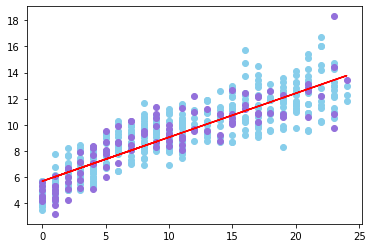

Equation: y = 0.335925268136616x + 5.698643225574845


In [4]:
# plot the train and test data, as well as the linear regression line
plt.scatter(train_input, y_train, c = 'skyblue')
plt.scatter(test_input, y_test, c = 'mediumpurple')
plt.plot(train_input.iloc[:,0], pred_train, c = 'red')
plt.show()

# print the equation of the model
print("Equation: y = {0}x + {1}".format(float(model.coef_), float(model.intercept_)))

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (6 out of 20)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import cross_val_score
import sklearn

# create a dataframe with degrees 1 to 10
df = pd.DataFrame({"degree" : range(1, 11)})

# write a function to define the input data, used to fit the model
def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    poly_trans = polynomial_features.fit_transform(x)
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

# append the dataframe with the negative mean squared error per degree and print it in descending order
df['test_error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y, scoring = "neg_mean_squared_error", cv = 10).mean())
df.sort_values('test_error', ascending = False) 

,degree,test_error
9,10,-1.400844
7,8,-1.407285
2,3,-1.409529
3,4,-1.412721
8,9,-1.413343
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


**Answer:** Actually, you could choose any degree between 2 and 10 and it will be more accurate than the previous model of degree 1. Anyways, I would choose degree 10, as it provides the lowest of all measured test errors. 

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (2 points out of 20)

In [6]:
# fit the 10 degree polynomial
polynomial_features = PolynomialFeatures(10)
x_poly = polynomial_features.fit_transform(x) 
model = linear_model.LinearRegression()
model.fit(x_poly, y)

# print the y-axis intersection
print("theta 0:", model.intercept_[0])

# loop from 1-10 to find the other coefficients and print them
for i in range(1,11):
    print("theta {0}: {1}".format(i, model.coef_[0][i]))

theta 0: 4.5615048467487185
theta 1: 7.673417808529225e-06
theta 2: 1.1990499281448506
theta 3: -0.7284883155246257
theta 4: 0.21801058727994393
theta 5: -0.036941327779588515
theta 6: 0.003751032559695888
theta 7: -0.0002323890372844436
theta 8: 8.598010683396042e-06
theta 9: -1.7444712149220628e-07
theta 10: 1.492767118973069e-09


### **2.c)** Indicate what is the expected error of your model when predicting the weight of children from their age in months. Note that the error should be in Kg, so take careful note of the units you are computing (2 out of 20)

In [10]:
import math

# apply the model
y_poly_pred = model.predict(x_poly)

# calculate the MSE
mse = mean_squared_error(y, y_poly_pred)

# take the square root of the MSE and print the result
expected_error = math.sqrt(mse)
print("Expected error: {0} kg".format(expected_error))

Expected error: 1.158796006776049 kg
